# BulkOmicsTools

In [81]:
# Data Science Tools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
# Bioinfokit
# !pip install bioinfokit
import bioinfokit as bik
from bioinfokit import analys, visuz

## Case #1 - Analyte name-only data

In [2]:
# Control
sample_T_C_1 = pd.read_excel('sample_T_C_1.xlsx' 
                             # ,header=None
                            ).iloc[:, 0].tolist()
sample_T_C_2 = pd.read_excel('sample_T_C_2.xlsx', 
                             # ,header=None
                            ).iloc[:, 0].tolist()
sample_T_C_3  = pd.read_excel('sample_T_C_3.xlsx', 
                              # ,header=None
                             ).iloc[:, 0].tolist()

# In Vitro
sample_T_invitro_1 = pd.read_excel('sample_T_in_vitro_1.xlsx', 
                                  # ,header=None
                                  ).iloc[:, 0].tolist()
sample_T_invitro_2 = pd.read_excel('sample_T_in_vitro_2.xlsx'
                                   # ,header=None
                                  ).iloc[:, 0].tolist()
sample_T_invitro_3 = pd.read_excel('sample_T_in_vitro_3.xlsx'
                                   # ,header=None
                                  ).iloc[:, 0].tolist()

# In Vivo
sample_T_invivo_1 = pd.read_excel('sample_T_in_vivo_1.xlsx'
                                  # ,header=None
                                 ).iloc[:, 0].tolist()
sample_T_invivo_2 = pd.read_excel('sample_T_in_vivo_2.xlsx'
                                 # ,header=None
                                 ).iloc[:, 0].tolist()
sample_T_invivo_3 = pd.read_excel('sample_T_in_vivo_3.xlsx'
                                 # ,header=None
                                 ).iloc[:, 0].tolist()

In [3]:
# Create a dictionary of Sample names and Analyte name-containing lists

data = {
    "Control T-cells 1": sample_T_C_1,
    "Control T-cells 2": sample_T_C_2,
    "Control T-cells 3": sample_T_C_3,

    "In Vitro T-cells 1": sample_T_invitro_1,
    "In Vitro T-cells 2": sample_T_invitro_2,
    "In Vitro T-cells 3": sample_T_invitro_3,

    "In Vivo T-cells 1": sample_T_invivo_1,
    "In Vivo T-cells 2": sample_T_invivo_2,
    "In Vivo T-cells 3": sample_T_invivo_3,
}

In [4]:
# Build a data frame of samples and their Analytes

Analytes = set(Analyte for sample in data.values() for Analyte in sample)

df = pd.DataFrame(
    {Analyte: [1 if Analyte in data[name] else 0 for name in data.keys()] for Analyte in Analytes},
    index=data.keys()
)

df

,Fumarate,L-Arginine,Pyruvate,Linoleate,Isocitrate,3-Phosphoglycerate,S-adenosylmethionine,Nitric oxide,Glutathione,Acetyl-CoA,...,Citrate,Oleate,Succinyl-CoA,Succinate,GTP,L-Isoleucine,Putrescine,Glucose-6-phosphate,UTP,Palmitate
Control T-cells 1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Control T-cells 2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
Control T-cells 3,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,0
In Vitro T-cells 1,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
In Vitro T-cells 2,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,1,1,1
In Vitro T-cells 3,1,0,1,1,1,1,1,1,1,1,...,1,0,1,1,1,0,1,1,1,0
In Vivo T-cells 1,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,1,0,1
In Vivo T-cells 2,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,1,0,1
In Vivo T-cells 3,1,0,1,1,1,1,1,1,1,1,...,1,0,1,1,0,0,1,1,0,0


## Case #2 - log-transofmed Analyte concentration data

In [82]:
df = pd.read_excel('Sci Rep Ivanisenko COVID data.xlsx')
df.rename(columns={'Unnamed: 0': 'Sample'}, inplace=True)
df.set_index(['Sample'], inplace=True)
df = df.T
df

Sample,Acetyl-Coa,Acetylcarnitine,Acetyllysine,Adenine,Aica-Riboside,Allantoic Acid,Alpha-Ketoisovaleric Acid,Alpha-N-Phenylacetyl-L-Glutamine,Aminoadipic Acid,Aminoimidazole Carboxamide Ribonucleotide,...,2-Hydroxybutanoic Acid,2-Oxo-3-Methyl-Butyrate,3-Aminoisobutanoic Acid,3-Hydroxybutyric Acid,3-Hydroxykynurenine,4-Hydroxybenzoic Acid,5-Hydroxy-L-Tryptophan,5-Methoxytryptophan,5'-Methylthioadenosine,7-Methylguanosine
CoV 1,4.521044,7.673878,6.327023,6.396826,5.121761,4.531762,5.071654,5.647877,5.857714,7.317364,...,4.905086,5.921536,5.422091,4.935852,7.690886,5.881068,4.978505,5.936925,5.783820,5.598440
CoV 2,4.487778,8.191340,6.390761,6.344364,5.289655,4.800746,5.516092,6.366312,6.002904,7.220100,...,4.890396,5.854254,5.545181,4.667196,7.636513,6.702969,5.010720,6.097419,5.546547,5.671034
CoV 3,4.934117,7.817233,6.289106,6.441450,5.199543,4.752052,4.778176,5.656031,5.872006,7.246022,...,4.301213,5.801542,5.623602,4.473151,7.673548,6.670294,5.090653,6.008737,5.459397,5.595223
CoV 4,4.407535,8.163450,6.465248,6.375513,5.096051,4.781898,4.967681,6.144808,5.812569,7.349231,...,4.900351,5.780877,5.398673,5.473301,7.652444,5.907666,4.789020,5.922292,5.839818,5.779476
CoV 5,4.521134,7.897220,6.355676,6.471690,5.228241,4.893663,4.876623,5.468630,5.868343,7.358292,...,4.641975,5.715197,5.583124,4.790130,7.644314,7.947061,5.174713,5.851722,5.425153,5.329863
CoV 6,4.307968,7.624537,6.445464,6.476138,5.197856,4.858300,4.813047,6.260720,5.859235,7.401801,...,4.515901,5.880992,5.649986,3.871344,7.500193,5.932735,5.215022,5.943349,5.911518,5.866466
CoV 7,4.263476,7.232206,6.126599,6.213511,5.219544,4.653278,4.698453,6.050492,5.931487,7.272955,...,4.490351,5.781236,5.570033,4.122491,7.699158,6.777521,4.820717,5.971011,5.459607,5.522371
CoV 8,4.604193,7.691679,6.298442,6.445448,5.101525,4.734680,4.934847,5.594161,5.788825,6.101577,...,4.375916,5.865272,5.550354,4.008632,7.726448,5.823237,5.108313,5.912129,5.601693,5.367061
CoV 9,4.481784,7.720444,6.189125,6.424718,5.247863,4.807709,5.072931,5.871955,5.939622,7.412167,...,4.669831,5.662658,5.550074,4.836758,7.626216,6.026222,4.928360,5.962945,5.620497,5.550912
CoV 10,4.599744,7.581427,6.296876,6.168554,5.243056,4.854673,4.570566,5.509957,5.923651,7.147046,...,4.291275,5.924041,5.699470,4.477588,7.606524,7.719715,4.831442,5.941267,5.408915,5.350492


In [83]:
# Cluster samples and Analytes

cluster_map = sns.clustermap(df)
plt.close()
clustered_rows = cluster_map.dendrogram_row.reordered_ind
clustered_cols = cluster_map.dendrogram_col.reordered_ind

clustered_df = df.iloc[:, clustered_cols] # Analyte clustering 
# clustered_df = df.iloc[clustered_rows, :].iloc[:, clustered_cols] # Analyte and sample clustering
clustered_df

Sample,Glycerophosphocholine,L-Histidine,Xanthine,L-Tyrosine,Methylcysteine,P-Coumaric Acid,Creatine,Indole,Pyridoxamine,Uric Acid,...,Aminoadipic Acid,Glucosamine,Orotic Acid,Suberic Acid,Aspartate,L-Serine,Phenyllactic Acid,3-Hydroxybutyric Acid,Aminoimidazole Carboxamide Ribonucleotide,Inosine
CoV 1,6.881797,6.819090,7.372580,6.764098,6.759576,6.752767,6.821952,6.943947,7.522539,7.442128,...,5.857714,6.233937,5.915783,5.996890,5.689009,5.904399,5.156536,4.935852,7.317364,7.085243
CoV 2,6.954195,6.884546,7.042532,6.742856,6.743247,6.694976,7.044986,6.954093,7.397939,7.445766,...,6.002904,6.328825,5.919020,6.016381,5.982942,6.099952,5.060526,4.667196,7.220100,6.123590
CoV 3,7.263609,7.168553,7.046302,6.819999,6.852491,6.767231,6.867609,7.103278,7.406370,7.379287,...,5.872006,6.193894,5.874309,5.905053,6.217744,6.213700,4.918508,4.473151,7.246022,4.904281
CoV 4,6.797197,6.837181,6.920465,6.765272,6.767853,6.716605,7.933434,6.853857,7.598315,7.532538,...,5.812569,6.202179,5.844018,5.999081,6.136673,6.024886,5.101418,5.473301,7.349231,6.132704
CoV 5,6.977422,7.011933,6.899484,6.883004,6.872194,6.816128,7.476110,7.183035,7.512806,7.456676,...,5.868343,6.196058,5.857260,6.004861,6.128240,6.185548,4.561781,4.790130,7.358292,6.468211
CoV 6,7.313597,6.767189,7.325914,6.871160,6.865736,6.803951,6.700826,7.238746,7.714054,7.600635,...,5.859235,5.958505,5.759149,6.071224,5.816083,5.895778,4.966830,3.871344,7.401801,6.955708
CoV 7,7.440704,7.161933,6.572925,6.636735,6.648960,6.609820,7.079554,6.919920,7.063771,7.167233,...,5.931487,6.284303,5.893222,6.025989,6.244339,6.156129,4.662699,4.122491,7.272955,6.991285
CoV 8,7.276435,6.994977,7.365284,6.830913,6.879412,6.831654,7.267972,7.215190,7.621086,7.528529,...,5.788825,6.165552,5.844125,5.947753,5.877729,6.091454,4.593333,4.008632,6.101577,4.334476
CoV 9,7.259090,6.886292,6.878417,6.801146,6.811386,6.778471,6.865502,7.023436,6.495616,6.460450,...,5.939622,6.311103,5.846492,6.045316,6.221078,6.137942,5.010273,4.836758,7.412167,6.602234
CoV 10,7.441513,6.894615,6.673951,6.555578,6.545316,6.474554,7.333703,6.555206,4.384885,4.439576,...,5.923651,6.348133,5.922453,6.050858,6.140984,6.189810,4.551426,4.477588,7.147046,4.828403


# Analyte Production Analysis

In [69]:
# Design matrix - Case #1
group_data = {
    'Sample': list(clustered_df.T.columns),
    'Group': [ 
              'Control T-cells','Control T-cells','Control T-cells',
              'In Vitro T-cells','In Vitro T-cells','In Vitro T-cells',
              'In Vivo T-cells','In Vivo T-cells','In Vivo T-cells',
              ]
}
group_df = pd.DataFrame(group_data)
unique_groups = group_df['Group'].unique()

# Map samples to their groups
column_to_group = dict(zip(group_df['Sample'], group_df['Group']))
column_to_group

In [84]:
# Design matrix - Case #2
group_data = {
    'Sample': list(clustered_df.T.columns),
    'Group': [ 
              'COVID-19','COVID-19','COVID-19','COVID-19','COVID-19','COVID-19','COVID-19','COVID-19','COVID-19','COVID-19',
              'COVID-19','COVID-19','COVID-19','COVID-19','COVID-19','COVID-19','COVID-19','COVID-19','COVID-19',
              'Control','Control','Control','Control','Control','Control','Control','Control','Control','Control',
              'Control','Control','Control','Control','Control','Control','Control','Control','Control','Control',
              'Control','Control','Control','Control','Control','Control','Control','Control','Control','Control'  
              ]
}
group_df = pd.DataFrame(group_data)
unique_groups = group_df['Group'].unique()

# Map samples to their groups
column_to_group = dict(zip(group_df['Sample'], group_df['Group']))
column_to_group

{'CoV 1': 'COVID-19',
 'CoV 2': 'COVID-19',
 'CoV 3': 'COVID-19',
 'CoV 4': 'COVID-19',
 'CoV 5': 'COVID-19',
 'CoV 6': 'COVID-19',
 'CoV 7': 'COVID-19',
 'CoV 8': 'COVID-19',
 'CoV 9': 'COVID-19',
 'CoV 10': 'COVID-19',
 'CoV 11': 'COVID-19',
 'CoV 12': 'COVID-19',
 'CoV 13': 'COVID-19',
 'CoV 14': 'COVID-19',
 'CoV 15': 'COVID-19',
 'CoV 16': 'COVID-19',
 'CoV 17': 'COVID-19',
 'CoV 18': 'COVID-19',
 'CoV 19': 'COVID-19',
 'Control 1': 'Control',
 'Control 2': 'Control',
 'Control 3': 'Control',
 'Control 4': 'Control',
 'Control 5': 'Control',
 'Control 6': 'Control',
 'Control 7': 'Control',
 'Control 8': 'Control',
 'Control 9': 'Control',
 'Control 10': 'Control',
 'Control 11': 'Control',
 'Control 12': 'Control',
 'Control 13': 'Control',
 'Control 14': 'Control',
 'Control 15': 'Control',
 'Control 16': 'Control',
 'Control 17': 'Control',
 'Control 18': 'Control',
 'Control 19': 'Control',
 'Control 20': 'Control',
 'Control 21': 'Control',
 'Control 22': 'Control',
 'Control

### PCA

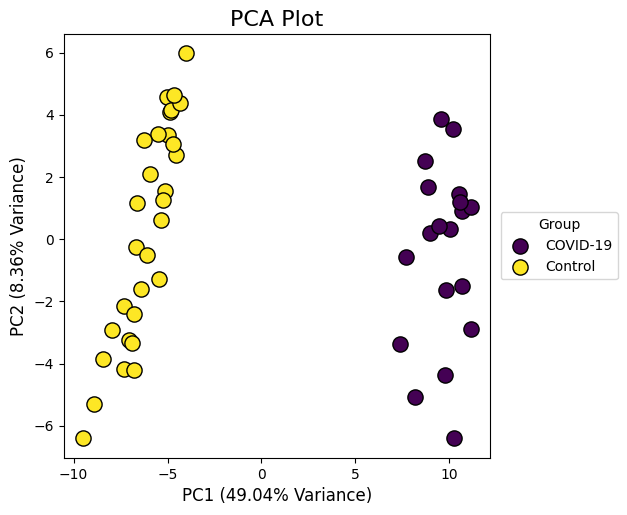

In [85]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustered_df)

# Perform PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)
pca_results

# Create a df for PCA results
pca_df = pd.DataFrame(data=pca_results, columns=['PC1', 'PC2'])
pca_df['Sample'] = list(clustered_df.T.columns)

# Plot the first 2 PC
plt.figure(figsize=(5.5, 5.5))

pca_df['Group'] = pca_df['Sample'].map(column_to_group)
unique_groups = pca_df['Group'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_groups))) # Choose cmap here, i.e. cm.viridis ot cm.tab10 
                                                               # https://matplotlib.org/stable/users/explain/colors/colormaps.html

for group, color in zip(unique_groups, colors):
    subset = pca_df[pca_df['Group'] == group]
    plt.scatter(
        subset['PC1'], subset['PC2'], 
        label=f"{group}",
        color=color, edgecolor='k', s=120
    )

plt.title('PCA Plot', fontsize=16)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)", fontsize=12)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)", fontsize=12)
plt.legend(
    title="Group", fontsize=10, loc='center left', 
    bbox_to_anchor=(1.025, 0.5), borderaxespad=0.
) 
# plt.grid(True)
plt.savefig('PCA plot.png', dpi=600, bbox_inches='tight')
plt.show()

### Heatmap

In [86]:
df_scaled_centred = stats.zscore(df, axis=0) # Case 2

visuz.gene_exp.hmap(
                    # df=df, # Case 1
                    df=df_scaled_centred, # Case 2
                    # cmap='bwr', # Case 1
                    cmap='viridis', # Case 2
                    # Keep the following consistent with the clustering step!!!
                    colclus=True, rowclus=False, # Analyte clustering
                    # colclus=True, rowclus=True, # Analyte and sample clustering
                    dim=(18,10),  
                    tickfont=(6,6), r=600, figname='clustered_df', show=False)
plt.close()

### Select Differentially Produced Analytes

In [87]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings("ignore")

df["Group"] = df.index.map(column_to_group)
significant_variables = []

significance_th = 0.05 # Pick significance threshold (0.05 / 0.01 / 0.005)

# Perform Two-Way ANOVA with Tukey correction for each Analyte
for variable in df.columns[:-1]:  # Exclude the "Group" column
    data_long = df.reset_index().melt(id_vars=["index", "Group"], value_vars=[variable])
    data_long.rename(columns={"index": "Sample", "value": "Value", "variable": "Variable"}, inplace=True)
    
    # Perform Two-Way ANOVA
    model = ols("Value ~ C(Group)", data=data_long).fit()
    anova_results = anova_lm(model)
    
    # Significance test
    if anova_results.loc["C(Group)", "PR(>F)"] < significance_th:
        # Perform Tukey
        tukey = pairwise_tukeyhsd(endog=data_long["Value"], groups=data_long["Group"], alpha=0.05)
        significant_comparisons = tukey.summary().data[1:]  # Skip the header
        
        # Check if any pairwise comparison is significant
        is_significant = any(row[4] < significance_th for row in significant_comparisons)
        
        if is_significant:
            significant_variables.append(variable)
            
warnings.filterwarnings("default")
df.drop(columns=["Group"], inplace=True)

# Create a new DataFrame with only significant Analytes
df_significant = df[significant_variables]
df_significant

Sample,Acetyl-Coa,Acetyllysine,Aica-Riboside,Aminoadipic Acid,Aminoimidazole Carboxamide Ribonucleotide,Ascorbic Acid,Aspartate,Beta Aminobutyric Acid,Betaine,Carnosine,...,Xanthosine,1-Methyladenosine,1-Methylnicotinamide,"1,4-Diaminobutane",2-Aminooctanoic Acid,3-Aminoisobutanoic Acid,4-Hydroxybenzoic Acid,5-Hydroxy-L-Tryptophan,5-Methoxytryptophan,5'-Methylthioadenosine
CoV 1,4.521044,6.327023,5.121761,5.857714,7.317364,5.198893,5.689009,6.181991,7.753383,6.674137,...,4.936397,6.154024,6.828294,6.528303,5.793986,5.422091,5.881068,4.978505,5.936925,5.783820
CoV 2,4.487778,6.390761,5.289655,6.002904,7.220100,4.989674,5.982942,6.250962,7.758183,6.684168,...,5.375650,5.867690,7.183682,6.340578,6.569523,5.545181,6.702969,5.010720,6.097419,5.546547
CoV 3,4.934117,6.289106,5.199543,5.872006,7.246022,5.736729,6.217744,6.362826,7.824911,6.632244,...,4.910179,6.013091,6.729602,6.288656,6.423494,5.623602,6.670294,5.090653,6.008737,5.459397
CoV 4,4.407535,6.465248,5.096051,5.812569,7.349231,5.197870,6.136673,6.154798,7.627203,6.595146,...,5.208778,6.190022,6.853046,6.726539,6.325091,5.398673,5.907666,4.789020,5.922292,5.839818
CoV 5,4.521134,6.355676,5.228241,5.868343,7.358292,5.612056,6.128240,6.373657,7.732509,6.632220,...,5.093791,5.935482,7.252987,6.436340,6.481275,5.583124,7.947061,5.174713,5.851722,5.425153
CoV 6,4.307968,6.445464,5.197856,5.859235,7.401801,5.380742,5.816083,6.408367,7.623335,6.574026,...,5.192601,6.302468,7.068217,5.936806,6.624220,5.649986,5.932735,5.215022,5.943349,5.911518
CoV 7,4.263476,6.126599,5.219544,5.931487,7.272955,5.058598,6.244339,6.367336,7.670718,6.652413,...,5.363691,5.888239,7.366367,6.349074,6.198957,5.570033,6.777521,4.820717,5.971011,5.459607
CoV 8,4.604193,6.298442,5.101525,5.788825,6.101577,5.514011,5.877729,6.323854,7.494081,6.618801,...,5.037919,6.104806,6.162263,6.279356,6.308067,5.550354,5.823237,5.108313,5.912129,5.601693
CoV 9,4.481784,6.189125,5.247863,5.939622,7.412167,5.463551,6.221078,6.273854,7.874547,6.693177,...,5.060082,6.273354,7.144243,6.515120,6.299716,5.550074,6.026222,4.928360,5.962945,5.620497
CoV 10,4.599744,6.296876,5.243056,5.923651,7.147046,5.396337,6.140984,6.457725,7.668873,6.647418,...,4.561058,5.786299,6.699508,6.370931,6.094742,5.699470,7.719715,4.831442,5.941267,5.408915


In [88]:
# Cluster differentially-produced Analytes

cluster_map = sns.clustermap(df_significant)
plt.close()
clustered_rows = cluster_map.dendrogram_row.reordered_ind
clustered_cols = cluster_map.dendrogram_col.reordered_ind

clustered_df_significant = df_significant.iloc[:, clustered_cols] # Analyte clustering 
# clustered_df_significant = df_significant.iloc[clustered_rows, :].iloc[:, clustered_cols] # Analyte and sample clustering
clustered_df_significant

Sample,4-Hydroxybenzoic Acid,Methylsuccinic Acid,Homovanillic Acid,Methionine Sulfoxide,L-Homocysteic Acid,5'-Methylthioadenosine,Guanidinoacetic Acid,Aica-Riboside,Melatonin,Ascorbic Acid,...,L-Alpha-Aminobutyric Acid,Glycerophosphocholine,Creatine,Indole,Mevalonic Acid,Purine,Creatinine,Gamma-Aminobutyric Acid,Glutamate,L-Arginine
CoV 1,5.881068,5.393319,5.631743,5.782237,5.715017,5.783820,5.814699,5.121761,5.291107,5.198893,...,6.543846,6.881797,6.821952,6.943947,6.672009,6.838600,6.999511,6.773092,6.810971,7.035924
CoV 2,6.702969,5.618684,5.747530,6.190434,5.686294,5.546547,5.368320,5.289655,5.952668,4.989674,...,6.675917,6.954195,7.044986,6.954093,6.476043,6.683716,7.163401,6.837826,7.265511,6.915304
CoV 3,6.670294,5.446279,5.661084,6.174375,5.732640,5.459397,5.314057,5.199543,5.345661,5.736729,...,6.668147,7.263609,6.867609,7.103278,6.818190,6.992445,6.972226,6.957165,7.575850,7.625368
CoV 4,5.907666,6.488969,5.754980,6.075693,5.536648,5.839818,5.726436,5.096051,5.486204,5.197870,...,6.494503,6.797197,7.933434,6.853857,6.625874,6.820518,6.822805,6.747783,7.033270,7.050902
CoV 5,7.947061,6.074815,5.643673,5.905048,5.632966,5.425153,5.762026,5.228241,5.378351,5.612056,...,6.698306,6.977422,7.476110,7.183035,6.672908,6.851249,6.789767,6.917783,7.194643,7.359884
CoV 6,5.932735,5.336960,5.668663,5.878228,5.581227,5.911518,5.310184,5.197856,5.553725,5.380742,...,6.684450,7.313597,6.700826,7.238746,6.746206,6.935224,6.859601,6.969798,6.936474,7.180064
CoV 7,6.777521,5.651784,5.732392,5.742778,5.674971,5.459607,4.974518,5.219544,5.111800,5.058598,...,6.642909,7.440704,7.079554,6.919920,6.601060,6.766057,6.618184,6.930255,7.223573,6.825085
CoV 8,5.823237,5.825743,5.629378,6.042053,5.627783,5.601693,5.211317,5.101525,5.545762,5.514011,...,6.602393,7.276435,7.267972,7.215190,6.811152,7.005357,6.719824,6.908516,7.389896,7.358760
CoV 9,6.026222,5.467956,5.735527,5.906892,5.717399,5.620497,5.379359,5.247863,5.067594,5.463551,...,6.628205,7.259090,6.865502,7.023436,6.747203,6.924042,6.765289,6.858369,7.336265,7.297019
CoV 10,7.719715,5.942339,5.725608,6.002008,5.740597,5.408915,5.255467,5.243056,5.104331,5.396337,...,6.743944,7.441513,7.333703,6.555206,6.540060,6.736220,6.836942,7.032244,7.416441,6.894243


In [89]:
df_scaled_centred_significant = stats.zscore(df_significant, axis=0) # Case 2

visuz.gene_exp.hmap(
                    # df=df_significant, # Case 1
                    df=df_scaled_centred_significant, # Case 2
                    # cmap='bwr', # Case 1
                    cmap='viridis', # Case 2
                    # Keep the following consistent with the clustering step!!!
                    colclus=True, rowclus=False, # Analyte clustering
                    # colclus=True, rowclus=True, # Analyte and sample clustering
                    dim=(12,10),  
                    tickfont=(6,6), r=600, figname='clustered_df_significant', show=False)
plt.close()

In [90]:
clustered_df_significant.T.to_csv('clustered_df_significant.csv') # For CytoScape

### Correlation analysis

In [91]:
# Perform analysis

corr_df = df_significant
corr_df.rename_axis("Analyte", inplace=True)
corr_df.rename_axis("Analyte", axis=1,inplace=True)

correlation_matrix = corr_df.corr(method='pearson') # pearson / spearman 

# Cluster
cluster_map = sns.clustermap(correlation_matrix)
plt.close()
clustered_rows = cluster_map.dendrogram_row.reordered_ind
clustered_cols = cluster_map.dendrogram_col.reordered_ind
correlation_matrix = correlation_matrix.iloc[clustered_rows, :].iloc[:, clustered_cols]


correlation_matrix

analyte,Ureidosuccinic Acid,Citraconic Acid,L-Glutamine,Pipecolic Acid,4-Hydroxybenzoic Acid,Hypoxanthine,1-Methylnicotinamide,Aminoadipic Acid,Homovanillic Acid,1-Methyladenosine,...,N-Acetyl-Glutamine,Acetyl-Coa,L-Valine,2-Aminooctanoic Acid,Urea,Xanthosine,Guanidinoacetic Acid,"1,4-Diaminobutane",L-Kynurenine,Melatonin
analyte,,,,,,,,,,,,,,,,,,,,,
Ureidosuccinic Acid,1.000000,0.066093,0.145189,-0.114791,-0.034527,-0.182451,-0.198791,-0.244482,-0.216177,-0.297440,...,0.123144,-0.025915,0.134180,0.032972,0.058025,0.155172,0.119636,-0.046242,-0.054679,0.093968
Citraconic Acid,0.066093,1.000000,0.335285,-0.269023,-0.270820,-0.241956,-0.239837,-0.339816,-0.266332,-0.107979,...,-0.075902,0.326984,-0.156975,-0.084131,-0.306101,-0.306333,-0.185603,-0.022300,0.043932,-0.075928
L-Glutamine,0.145189,0.335285,1.000000,0.062964,-0.170551,-0.113943,-0.110457,-0.285671,-0.297217,-0.230215,...,0.086794,-0.079861,-0.229464,-0.195481,-0.204706,-0.055245,-0.020242,0.141263,-0.283848,0.090130
Pipecolic Acid,-0.114791,-0.269023,0.062964,1.000000,0.749935,0.805558,0.801686,0.748188,0.732761,0.704210,...,0.559022,0.343603,0.367252,0.217716,0.489327,0.524331,0.519704,0.560671,0.298059,0.425070
4-Hydroxybenzoic Acid,-0.034527,-0.270820,-0.170551,0.749935,1.000000,0.756889,0.758513,0.736715,0.785132,0.560448,...,0.432844,0.233217,0.450897,0.416749,0.419502,0.423659,0.353121,0.390694,0.189808,0.247404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xanthosine,0.155172,-0.306333,-0.055245,0.524331,0.423659,0.546989,0.544117,0.529617,0.520889,0.328579,...,0.285079,0.042615,0.173220,0.092937,0.538385,1.000000,0.354396,0.330379,0.229781,0.387906
Guanidinoacetic Acid,0.119636,-0.185603,-0.020242,0.519704,0.353121,0.483456,0.482337,0.504039,0.418739,0.375859,...,0.352921,0.319009,0.423104,-0.095692,0.457246,0.354396,1.000000,0.540476,0.311568,0.312985
"1,4-Diaminobutane",-0.046242,-0.022300,0.141263,0.560671,0.390694,0.473983,0.471527,0.429804,0.481981,0.433660,...,0.385219,0.376871,0.161960,-0.018792,0.329012,0.330379,0.540476,1.000000,0.155687,0.190519


In [92]:
plt.figure(figsize=(24,24)) #Size

sns.heatmap(
    correlation_matrix,   # df
    cmap="bwr",           # Color map
    cbar=False,           # Show the scale
    annot_kws={"size": 8} # Font size
)

# Save the heatmap
output_path = "correlation_matrix_heatmap.png"
plt.savefig(output_path, dpi=600, bbox_inches="tight")
plt.close()